$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

Build a binary classifier for human versus horse based on logistic regression using the dataset that consists of human and horse images

In [117]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os

transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),
    # the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  

validation_data_path = 'horse-or-human/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

NUM_EPOCH = range(1) # my code

#
# Image size and number of data
#
image_size = 10000
train_count = 1027
validation_count = 256

train_label = np.empty(train_count, dtype=float)
train_data = np.ones((train_count, image_size + 1), dtype=float)

validation_label = np.empty(validation_count, dtype=float)
validation_data = np.ones((validation_count, image_size + 1), dtype=float)

for epoch in (NUM_EPOCH):
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)
        
        train_label[i] = int(labels)
        train_tmp = np.asfarray(inputs)
        train_data[i, :10000] = train_tmp[0, 0, :, :].reshape(10000)
        
    # load validation images of the batch size for every iteration
    for i, data in enumerate(valloader):
        
        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)
        
        validation_label[i] = int(labels)
        validation_tmp = np.asfarray(inputs)
        validation_data[i, :10000] = validation_tmp[0, 0, :, :].reshape(10000)

In [118]:
np.random.seed(1)

learningRate = 10**(-5)
delta = 10**(-9)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def loss_function(t, y):
    return -np.sum(t*np.log(y+delta) + (1-t)*np.log(1-y+delta)) 

iteration = 5000

#d = np.empty(train_count, dtype=float)

u = np.empty((image_size + 1, 100), dtype=float)
v = np.empty((100, 100), dtype=float)
w = np.empty(1, dtype=float)

a = np.empty((train_count, 100), dtype=float)
b = np.empty((train_count, 100), dtype=float)
c = np.empty(train_count, dtype=float)
h = np.empty(train_count, dtype=float)

t_a = np.empty((train_count, 1), dtype=float)
t_b = np.empty((train_count, 1), dtype=float)
t_c = np.empty(train_count, dtype=float)
t_h = np.empty(train_count, dtype=float)

loss_arr = np.zeros(iteration, dtype=float)
t_loss_arr = np.zeros(iteration, dtype=float)
loss_value_arr = np.zeros(iteration, dtype=float)
t_loss_value_arr = np.zeros(iteration, dtype=float)

for i in range(image_size + 1):
    for j in range(100):
        u[i, j] = np.random.rand(1)

for i in range(100):
    for j in range(100):
        v[i, j] = np.random.rand(1)

for i in range(100):
    w[i] = np.random.rand(1)


In [149]:
d_lc = np.empty(train_count, dtype=float)
d_cb = np.empty(train_count, dtype=float)
d_ba = np.empty(train_count, dtype=float)

for iter in range(iteration):
    
    for i in range(train_count):
        for j in range(100):
            a[i, j] = u[:, j].dot(train_data[i, :])
    
    for i in range(validation_count):
        for j in range(100):
            t_a[i, j] = u[:, j].dot(validation_data[i, :])
    
    for i in range(train_count):
        for j in range(100):
            b[i, j] = v[:, j].dot(sigmoid(a[i, :]))
    
    for i in range(validation_count):
        for j in range(100):
            t_b[i, j] = v[:, j].dot(sigmoid(t_a[i, :]))
    
    for i in range(train_count):
        c[i] = w[:].dot(sigmoid(b[i ,:]))
    
    for i in range(validation_count):
        t_c[i] = w[:].dot(sigmoid(t_b[i ,:]))

    for i in range(train_count):
        h[i] = sigmoid(c[i])
    
    for i in range(validation_count):
        t_h[i] = sigmoid(t_c[i])
    
    for i in range(train_count):
        d_lc[i] = (h[i] - train_label[i])
        d_cb[i] = w[:].dot(sigmoid(b[i, :] * (1 - sigmoid(b[i, :]))))
        d_ba[i] = 0
        
        for j in range(1):
            d_ba[i] += v[:, j].dot(sigmoid(a[i, :] * (1 - sigmoid(a[i, :]))))
        d_ba[i] /= 100
        
    for i in range(image_size):
        for j in range(100):
            u[i, j] = u[i, j] - learningRate * np.sum(d_lc[:] * d_cb[:] * d_ba[:] * train_data[:, i])
        
    for i in range(100):
        for j in range(100):
            v[i, j] = v[i, j] - learningRate * np.sum(d_lc[:] * d_cb[:] * sigmoid(a[:, i]))
    
    for i in range(100):
        w[i] = w[i] - learningRate * np.sum(d_lc[:] * sigmoid(b[:, i]))
    
    loss_value = 0
    t_loss_value = 0
    training_loss = 0
    testing_loss = 0
    
    for i in range(train_count):
        loss_value += loss_function(train_label[i], h[i])

        if train_label[i] == 1:
            if h[i] <= 0.5: # loss count
                training_loss += 1

        else:
            if h[i] > 0.5: # loss count
                training_loss += 1

    for i in range(validation_count):
        t_loss_value += loss_function(validation_label[i], t_h[i])
        if validation_label[i] == 1:
            if t_h[i] <= 0.5: # loss count
                testing_loss += 1

        else:
            if t_h[i] > 0.5: # loss count
                testing_loss += 1

    if iter % 200 == 0:
        print("iter =", iter)
        print("train loss count =", training_loss)
        print("train loss value =", loss_value / train_count)
        print("validation loss count =", testing_loss)
        print("validation loss value =", t_loss_value / validation_count)
        
    loss_value_arr[iter] = loss_value
    t_loss_value_arr[iter] = t_loss_value
    loss_arr[iter] = training_loss
    t_loss_arr[iter] = testing_loss

iter = 0
train loss count = 500
train loss value = 10.089223873365171
validation loss count = 128
validation loss value = 10.361632917973196
iter = 200
train loss count = 447
train loss value = 7.195869957636423
validation loss count = 120
validation loss value = 7.433517115851054
iter = 400
train loss count = 277
train loss value = 1.7863099079727733
validation loss count = 98
validation loss value = 2.663051885634853
iter = 600
train loss count = 211
train loss value = 0.7545228303506877
validation loss count = 52
validation loss value = 0.8571300714454198
iter = 800
train loss count = 180
train loss value = 0.5332049832863697
validation loss count = 54
validation loss value = 0.9215650953797833
iter = 1000
train loss count = 163
train loss value = 0.43567181887495976
validation loss count = 55
validation loss value = 0.9828712530247964
iter = 1200
train loss count = 147
train loss value = 0.3736234625371987
validation loss count = 57
validation loss value = 1.0281688056977245
iter =

Plot training Loss and Accuracy

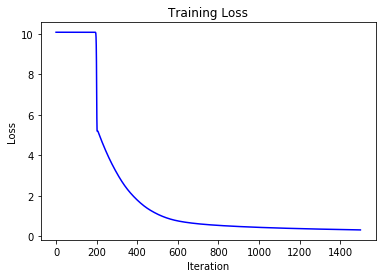

In [150]:
x = range(iteration)
y = loss_value_arr[x] / train_count

plt.plot(x, y, "BLUE")
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

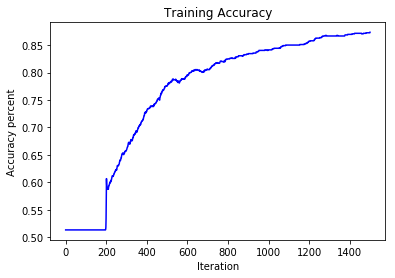

In [151]:
x = range(iteration)
y = (train_count - loss_arr[x]) / train_count

plt.plot(x, y, "BLUE")
plt.title('Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Plot Validation Loss and Accuracy

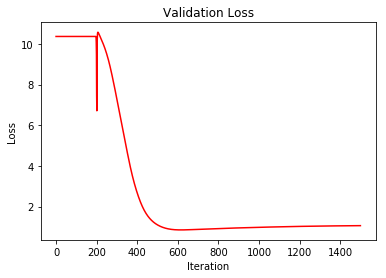

In [152]:
x = range(iteration)
y = t_loss_value_arr[x] / validation_count

plt.plot(x, y, "RED")
plt.title('Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

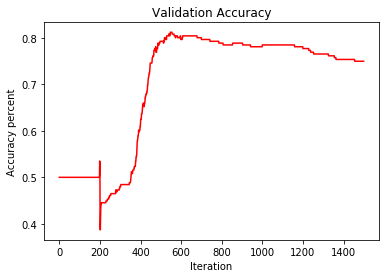

In [153]:
x = range(iteration)
y = (validation_count - t_loss_arr[x]) / validation_count

plt.plot(x, y, "RED")
plt.title('Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Plot Training and Validation at every iteration

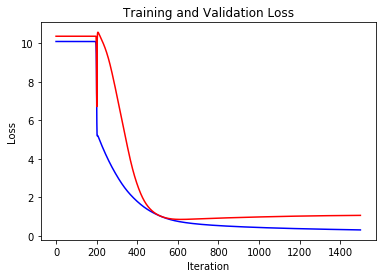

In [154]:
x = range(iteration)
y1 = loss_value_arr[x] / train_count
y2 = t_loss_value_arr[x] / validation_count

plt.plot(x, y1, "BLUE")
plt.plot(x, y2, "RED")
plt.title('Training and Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

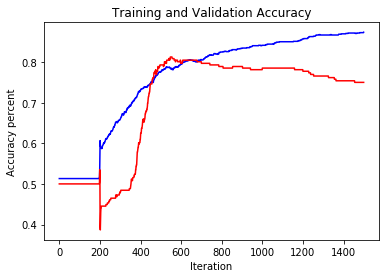

In [155]:
x = range(iteration)
y1 = (train_count - loss_arr[x]) / train_count
y2 = (validation_count - t_loss_arr[x]) / validation_count

plt.plot(x, y1, "BLUE")
plt.plot(x, y2, "RED")
plt.title('Training and Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Present the table for the final accuracy and loss with training and validation datasets as below:

In [156]:
print ('Final Training Loss =', loss_value_arr[iteration - 1] / train_count)
print ('Final Training Accuracy =', (train_count - loss_arr[iteration - 1]) / train_count * 100, '%')
print ('Final Validation Loss =', t_loss_value_arr[iteration - 1] / validation_count)
print ('Final Validation Accuracy =', (validation_count - t_loss_arr[iteration - 1]) / validation_count * 100, '%')

Final Training Loss = 0.31013416190346643
Final Training Accuracy = 87.34177215189874 %
Final Validation Loss = 1.064814328940255
Final Validation Accuracy = 75.0 %


In [157]:
import pandas as pd

idx1 = round(loss_value_arr[iteration - 1] / train_count, 6)
idx2 = str(round((train_count - loss_arr[iteration - 1]) / train_count * 100, 2)) + ' %'
idx3 = round(t_loss_value_arr[iteration - 1] / validation_count, 6)
idx4 = str(round((validation_count - t_loss_arr[iteration - 1]) / validation_count * 100, 2)) + ' %'

df = pd.DataFrame(data=np.array([[idx1, idx2], [idx3, idx4]]), index= ['Training', 'Validation'], columns=['Loss', 'Accuracy'])
display(df)

,Loss,Accuracy
Training,0.310134,87.34 %
Validation,1.064814,75.0 %


MarkDown :

| Dataset | Loss | Accuracy |
|:--------|:--------:|--------:|
| Training | 0.310134 | 87.34% |
| Validation | 1.064814 | 75.0% |